<a href="https://colab.research.google.com/github/rencinj/BootCamp2/blob/main/ARIMA_Theory_%2B_Coding_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ARIMA Theory_Part**

ARIMA is a widely-used statistical model for time series forecasting. It stands for **AutoRegressive Integrated Moving Average**. The model uses three key parameters, `p`, `d`, and `q`, to define the behavior of the time series data. Let's break them down with a simple explanation:

### 1. **p (AutoRegressive - AR part)**

- **What it means:**
  - The parameter `p` refers to the **number of past values (lags)** used to predict the future value.
  - In other words, it's how many previous time points we are looking at to make a prediction.

- **Example:**
  Imagine you’re trying to predict today’s temperature based on the temperatures of the last few days. If you use only yesterday’s temperature, that’s `p = 1`. If you use the temperatures of the last two days, that’s `p = 2`, and so on.

### 2. **d (Integrated - I part)**

- **What it means:**
  - The parameter `d` refers to **how many times we need to "difference" the data** to make it stationary (where the mean and variance do not change over time).
  - "Differencing" means subtracting the previous value from the current value to remove trends and make the data stable over time.

- **Example:**
  Let’s say your data has an increasing trend over time (e.g., sales going up month by month). Applying one round of differencing (`d = 1`) would transform the data into differences between consecutive months (change in sales), instead of the actual sales values. If the data still has trends after one round, you might apply differencing again (`d = 2`).

### 3. **q (Moving Average - MA part)**

- **What it means:**
  - The parameter `q` refers to the **number of past forecast errors** used to predict the future.
  - Instead of looking at past values directly (like `p`), this part looks at how well past forecasts did (the difference between predicted and actual values).

- **Example:**
  If yesterday’s forecast was off by 5 units, that "error" can be used to adjust today’s prediction. If you use only the last forecast error, that’s `q = 1`. If you consider errors from the last two forecasts, that’s `q = 2`, and so on.

---

### How ARIMA (p, d, q) Works Together:

- **AR (p)**: Looks at the relationship between past values (e.g., today’s sales may depend on last week’s sales).
- **I (d)**: Makes the data stationary by removing trends or seasonality through differencing.
- **MA (q)**: Accounts for past forecasting errors to improve the current forecast.

### Example of ARIMA(1,1,1):

- **p = 1**: We use the previous value to predict the next one.
- **d = 1**: We difference the data once to remove any trends.
- **q = 1**: We use the previous forecast error to improve the current prediction.

### Visualizing ARIMA Components:

- **Without differencing (`d = 0`)**: We might just rely on the past values and forecast errors to make predictions.
- **With differencing (`d = 1`)**: We transform the data so it has a constant mean and variance over time, which simplifies the prediction process.

### When to Use ARIMA:
- **Stationary data:** If the data is stable (mean and variance are constant), you may not need differencing (`d = 0`).
- **Non-stationary data:** If the data has trends or seasonality, you use differencing (`d > 0`) to stabilize it.

---

**In simple terms**, ARIMA looks at:
- **p (AR)**: How much the past values matter.
- **d (I)**: How much we need to adjust the data to remove trends.
- **q (MA)**: How much we rely on past prediction mistakes to improve future predictions.

# **🛒 Real-World Example: Grocery Store Milk Sales**

`Imagine you run a grocery store, and you track how many liters of milk you sell each day.`

| Day | Milk Sold |
| --- | --------- |
| 1   | 100       |
| 2   | 110       |
| 3   | 108       |
| 4   | 115       |
| ... | ...       |
| ?   | ???       |


🎯 ARIMA is a smart way of saying:
“Let’s use what happened in the past to guess what will happen tomorrow — but let’s be smart about how we do it.”

**🤖 1. AR – AutoRegressive = "Use Past Numbers"**

This says:

“What you sold yesterday and the day before affects today.”

📌 Example:
If you sold 110 liters yesterday and 108 the day before, maybe you’ll sell around 112 today.

Your future depends on your past sales.

**🧮 2. I – Integrated = "Make the Trend Flat First"**

This says:

“If your sales are slowly increasing every day, we need to subtract that trend to make the data more stable.”

📌 Example:
If your sales go like this: 100 → 105 → 110 → 115 → 120
Instead of using the actual numbers, we use the change: +5 → +5 → +5 → +5
This makes it easier to forecast.

**🪄 3. MA – Moving Average = "Learn From Past Mistakes"**

This says:

“If we predicted wrong yesterday, let’s adjust today’s guess to do better.”

📌 Example:
If we guessed 110 but sold 115 (off by +5), then maybe today we increase the guess a bit to make up for it.

| Term | Meaning in Grocery Store                                                        |
| ---- | ------------------------------------------------------------------------------- |
| AR   | Use sales from yesterday & the day before to guess today                        |
| I    | If your sales always go up 5 units daily, remove that trend to focus on changes |
| MA   | If your guess was too low yesterday, increase today’s guess a little            |


# **ARIMA Coding_Part**

# Installing the Library

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.0 MB/s eta 0:00:00


# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np

#Read Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Black Elephant/ARIMA Coding Part/AirPassengers.csv',index_col='Month',parse_dates=True)

In [ ]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Summarize the Dataset

In [ ]:
df.shape

(144, 1)

In [ ]:
df.dtypes

#Passengers    int64
dtype: object

# Performing EDA

In [ ]:
df.isnull().sum()

#Passengers    0
dtype: int64

#Plot Your Data

<Axes: xlabel='Month'>

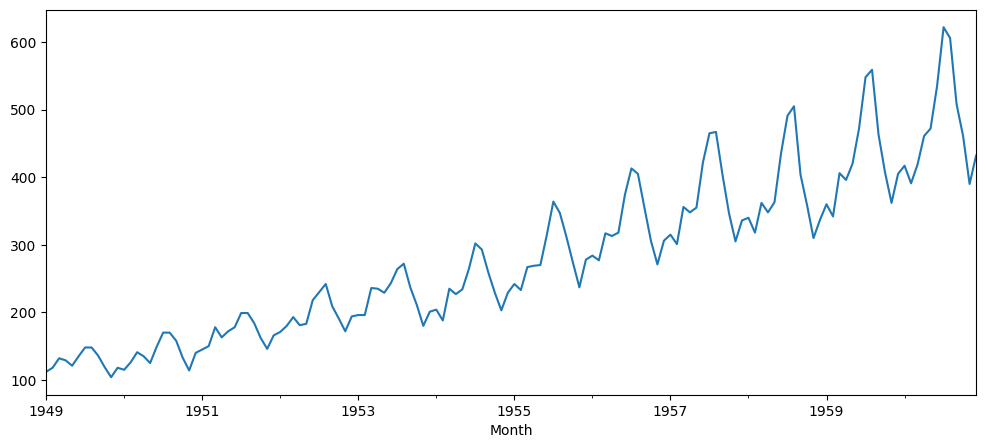

In [ ]:
df['#Passengers'].plot(figsize=(12,5))

#Figure Out Order for ARIMA Model

In [ ]:
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(df['#Passengers'],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Sun, 02 Jun 2024   AIC                           1365.825
Time:                        14:03:00   BIC                           1389.528
Sample:                    01-01-1949   HQIC                          1375.457
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1731     85.616      8.458      0.000     556.369     891.977
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Loading ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

In [ ]:
print(df.shape)

(144, 1)


In [ ]:
df.head(12)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [ ]:
train = df.iloc[:-12]

In [ ]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [ ]:
test = df.iloc[-12:]

In [ ]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [ ]:
print(train.shape,test.shape)

(132, 1) (12, 1)


## Train the Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(train['#Passengers'],order=(4, 1, 3))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model

In [ ]:
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  132
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -607.206
Date:                Sun, 02 Jun 2024   AIC                           1230.412
Time:                        14:15:13   BIC                           1253.414
Sample:                    01-01-1949   HQIC                          1239.759
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5693      0.115     -4.968      0.000      -0.794      -0.345
ar.L2          0.4828      0.123      3.935      0.000       0.242       0.723
ar.L3          0.1164      0.128      0.911      0.362      -0.134       0.367
ar.L4         -0.5331      0.084     -6.378      0.000      -0.697      -0.369
ma.L1          0.9304      0.103      8.994      0.000       0.728       1.133
ma.L2         -0.5541      0.151     -3.670      0.000      -0.850      -0.258
ma.L3         -0.7290      0.102     -7.155      0.000      -0.929      -0.529
sigma2       607.4737     76.263      7.965      0.000     458.000     756.947
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                11.03
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               4.40   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Make Predictions on Test Set

In [ ]:
start = len(train)

In [ ]:
end = len(train) + len(test) - 1

In [ ]:
start, end

(132, 143)

In [ ]:
pred = model.predict(start=start,end=end)

In [ ]:
pred # Model Prediction

1960-01-01    441.014228
1960-02-01    446.034151
1960-03-01    469.988825
1960-04-01    440.043188
1960-05-01    450.040042
1960-06-01    430.002110
1960-07-01    429.978878
1960-08-01    437.445810
1960-09-01    425.521790
1960-10-01    446.595406
1960-11-01    429.723125
1960-12-01    444.134239
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
test # Actual Test Data

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


<Axes: xlabel='Month'>

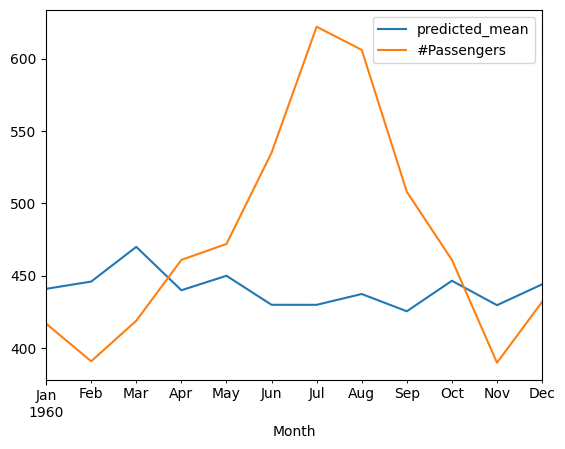

In [ ]:
pred.plot(legend='Model_Prediction') # Model Prediction
test['#Passengers'].plot(legend=True) # Actual Values

# Finding the Model Accuracy

In [ ]:
test['#Passengers'].mean()

476.1666666666667

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from math import sqrt

In [ ]:
rmse = sqrt(mean_squared_error(pred, test['#Passengers']))

In [ ]:
print('Root Mean Square Error:',rmse)

Root Mean Square Error: 87.6399954705978


#For Future Dates

In [ ]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [ ]:
index_future_dates = pd.date_range(start='1961-01-01',end='1961-12-01',freq='MS')

In [ ]:
index_future_dates

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
len(df)

144

In [ ]:
len(df)+12-1

155

In [ ]:
model.predict(start=len(df),end=len(df)+12-1)

1961-01-01    436.594051
1961-02-01    434.645531
1961-03-01    442.786794
1961-04-01    428.650602
1961-05-01    444.421929
1961-06-01    430.604835
1961-07-01    440.099551
1961-08-01    437.395467
1961-09-01    433.502589
1961-10-01    442.884668
1961-11-01    430.287372
1961-12-01    442.977132
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: >

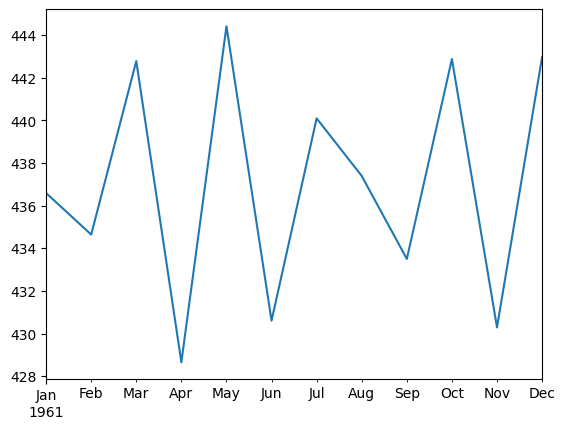

In [ ]:
model.predict(start=len(df),end=len(df)+12-1).plot() # Future Prediction